In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
np.random.seed(42)

df = pd.read_csv('yeast.csv')

print(df.head().to_string())

print(df.describe().round(3).to_string())

missing = df.isnull().sum()

# dataset distribution
class_counts = df['Class'].value_counts().sort_values(ascending=False)
total = len(df)

for cls, count in class_counts.items():
    pct = 100 * count / total
    bar = "█" * int(pct/2)
    print(f"      {cls:4s}: {count:4d} ({pct:5.1f}%) {bar}")

X = df.drop(['Sequence Name', 'Class'], axis=1).values
y = df['Class'].values

print(f"X shape: {X.shape} (samples × features)")
print(f"y shape: {y.shape} (samples)")
print(f"Features: {list(df.drop(['Sequence Name', 'Class'], axis=1).columns)}")

# corelation matrix
fig, ax = plt.subplots(figsize=(10, 8))
feature_cols = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']
corr_matrix = df[feature_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, ax=ax)
ax.set_title('Matriz de Correlação das Features')
plt.tight_layout()
plt.savefig('../results/q2_correlacao.png', dpi=150)
plt.close()

fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.tab10(np.linspace(0, 1, 10))
bars = ax.bar(class_counts.index, class_counts.values, color=colors)

ax.set_xlabel('Classe')
ax.set_ylabel('Quantidade')
ax.set_title('Distribuição das 10 Classes Originais do Dataset Yeast')

for bar, count in zip(bars, class_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
            str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('../results/q2_distribuicao_classes.png', dpi=150)
plt.close()

  Sequence Name   mcg   gvh   alm   mit  erl  pox   vac   nuc Class
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3    AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
4    AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT
            mcg       gvh       alm       mit       erl       pox       vac       nuc
count  1484.000  1484.000  1484.000  1484.000  1484.000  1484.000  1484.000  1484.000
mean      0.500     0.500     0.500     0.261     0.505     0.008     0.500     0.276
std       0.137     0.124     0.087     0.137     0.048     0.076     0.058     0.106
min       0.110     0.130     0.210     0.000     0.500     0.000     0.000     0.000
25%       0.410     0.420     0.460     0.170     0.500     0.000     0.480     0.220
50%       0.490     0.490     0.510     0.220     0.500     0.000     0.510 

Samples: 1484
Features: 8
Classes: ['CYT', 'ERL', 'EXC', 'ME1', 'ME2', 'ME3', 'MIT', 'NUC', 'POX', 'VAC']
 CYT → 0 ( 463 samples,  31.2%)
 ERL → 1 (   5 samples,   0.3%)
 EXC → 2 (  35 samples,   2.4%)
 ME1 → 3 (  44 samples,   3.0%)
 ME2 → 4 (  51 samples,   3.4%)
 ME3 → 5 ( 163 samples,  11.0%)
 MIT → 6 ( 244 samples,  16.4%)
 NUC → 7 ( 429 samples,  28.9%)
 POX → 8 (  20 samples,   1.3%)
 VAC → 9 (  30 samples,   2.0%)
Labels carregados de crisp_partition.txt
Total de labels: 1484
Composição dos clusters (classes originais em cada cluster):
📦 CLUSTER 0:
  POX :   11 ( 37.9%) ███████
  CYT :    5 ( 17.2%) ███
  ERL :    5 ( 17.2%) ███
  MIT :    3 ( 10.3%) ██
  NUC :    3 ( 10.3%) ██
  ME2 :    1 (  3.4%) 
  ME3 :    1 (  3.4%) 
📦 CLUSTER 1:
  CYT :  458 ( 31.5%) ██████
  NUC :  426 ( 29.3%) █████
  MIT :  241 ( 16.6%) ███
  ME3 :  162 ( 11.1%) ██
  ME2 :   50 (  3.4%) 
  ME1 :   44 (  3.0%) 
  EXC :   35 (  2.4%) 
  VAC :   30 (  2.1%) 
  POX :    9 (  0.6%) 


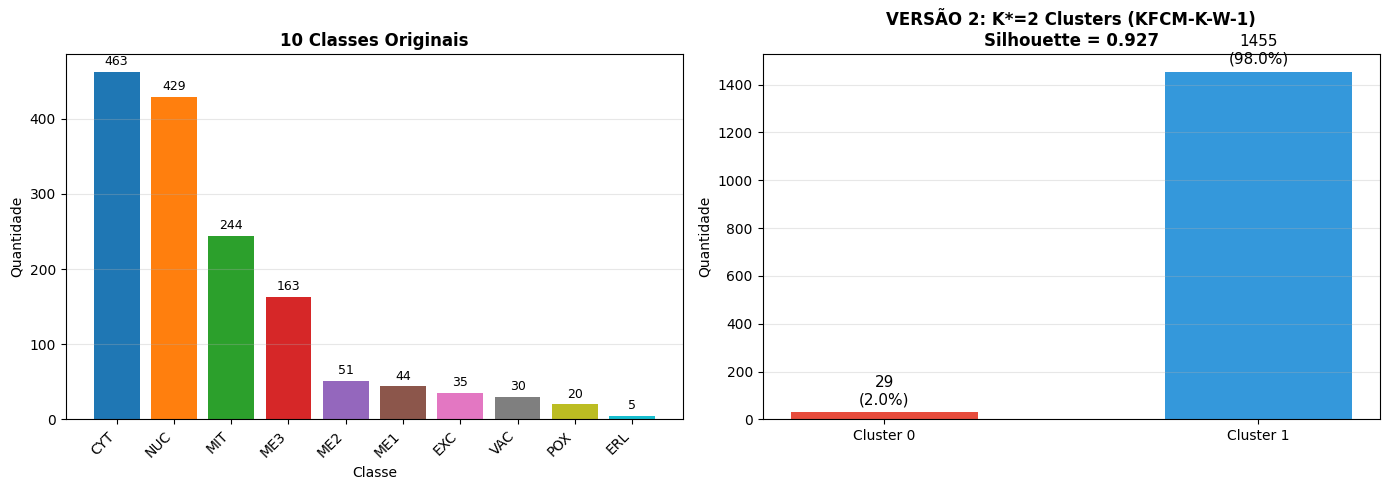

In [7]:
"""
2 versions of Yeast:
- 10 original classes
- K* classes (K* = 2, KFCM-K-W-1 from question 1) (crisp_partition.txt),

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import json

df = pd.read_csv('yeast.csv')
X = df.drop(['Sequence Name', 'Class'], axis=1).values
y_original = df['Class'].values

print(f"Samples: {len(y_original)}")
print(f"Features: {X.shape[1]}")
print(f"Classes: {list(np.unique(y_original))}")

# 10 classes
le_10 = LabelEncoder()
y_10classes = le_10.fit_transform(y_original)

for i, cls in enumerate(le_10.classes_):
    count = np.sum(y_original == cls)
    pct = 100 * count / len(y_original)
    print(f" {cls} → {i} ({count:4d} samples, {pct:5.1f}%)")

# 2 Classes
y_2classes = np.loadtxt('../results/crisp_partition.txt').astype(int)

print(f"Labels carregados de crisp_partition.txt")
print(f"Total de labels: {len(y_2classes)}")

# Verificar consistência
assert len(y_2classes) == len(y_original), "ERRO: Número de labels diferente do número de amostras!"

# Contagem
count_0 = np.sum(y_2classes == 0)
count_1 = np.sum(y_2classes == 1)

# Analisar composição dos clusters
print("Composição dos clusters (classes originais em cada cluster):")
for cluster in [0, 1]:
    print(f"📦 CLUSTER {cluster}:")
    mask = y_2classes == cluster
    classes_in_cluster = y_original[mask]
    class_counts = Counter(classes_in_cluster)

    total = sum(class_counts.values())
    for cls, count in sorted(class_counts.items(), key=lambda x: -x[1]):
        pct = 100 * count / total
        bar = "█"* int(pct/5)
        print(f"  {cls:4s}: {count:4d} ({pct:5.1f}%) {bar}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 10 classes
ax1 = axes[0]
class_counts_10 = pd.Series(y_original).value_counts().sort_values(ascending=False)
colors_10 = plt.cm.tab10(np.linspace(0, 1, 10))
bars1 = ax1.bar(range(len(class_counts_10)), class_counts_10.values, color=colors_10)
ax1.set_xticks(range(len(class_counts_10)))
ax1.set_xticklabels(class_counts_10.index, rotation=45, ha='right')

ax1.set_xlabel('Classe')
ax1.set_ylabel('Quantidade')
ax1.set_title('10 Classes Originais', fontsize=12, fontweight='bold')

ax1.grid(axis='y', alpha=0.3)

for bar, count in zip(bars1, class_counts_10.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             str(count), ha='center', va='bottom', fontsize=9)

# 2 clusters (KFCM-K-W-1)
ax2 = axes[1]
class_counts_2 = [count_0, count_1]
colors_2 = ['#e74c3c', '#3498db']
bars2 = ax2.bar(['Cluster 0', 'Cluster 1'], class_counts_2, color=colors_2, width=0.5)
ax2.set_ylabel('Quantidade')
ax2.set_title('VERSÃO 2: K*=2 Clusters (KFCM-K-W-1)\nSilhouette = 0.927',
              fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

for bar, count in zip(bars2, class_counts_2):
    pct = 100 * count / len(y_2classes)
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
             f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig('../results/q2_duas_versoes.png', dpi=150, bbox_inches='tight')
plt.show()

In [3]:
"""
30×10-FOLDS - NESTED CV

"""

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.neighbors import NearestNeighbors, KernelDensity
from collections import Counter
import warnings
import time
warnings.filterwarnings('ignore')

print("="*70)
print("30x10-FOLDS")
print("="*70)

class GaussianBayesian(BaseEstimator, ClassifierMixin):
    """bayesian classifier with multivariate normal distribution."""
    def __init__(self):
        self.classes_ = None
        self.priors_ = {}
        self.means_ = {}
        self.covs_inv_ = {}
        self.covs_det_ = {}

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape

        for c in self.classes_:
            X_c = X[y == c]
            self.priors_[c] = len(X_c) / n_samples
            self.means_[c] = np.mean(X_c, axis=0)
            cov = np.cov(X_c.T) + 1e-6 * np.eye(n_features)
            self.covs_inv_[c] = np.linalg.inv(cov)
            self.covs_det_[c] = np.linalg.det(cov)
        return self

    def _log_likelihood(self, X, c):
        d = X.shape[1]
        diff = X - self.means_[c]
        mahalanobis = np.sum(diff @ self.covs_inv_[c] * diff, axis=1)
        return -0.5 * d * np.log(2*np.pi) - 0.5 * np.log(self.covs_det_[c]) - 0.5 * mahalanobis

    def predict_proba(self, X):
        log_post = np.zeros((X.shape[0], len(self.classes_)))
        for i, c in enumerate(self.classes_):
            log_post[:, i] = self._log_likelihood(X, c) + np.log(self.priors_[c])
        log_post_max = np.max(log_post, axis=1, keepdims=True)
        post = np.exp(log_post - log_post_max)
        return post / np.sum(post, axis=1, keepdims=True)

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]


class BayesianKNN(BaseEstimator, ClassifierMixin):
    """bayesian classifier based on K-nearest neighbors."""
    def __init__(self, n_neighbors=5, metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.metric = metric

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.X_train_ = X.copy()
        self.y_train_ = y.copy()
        n_samples = len(y)
        self.n_samples_per_class_ = {c: np.sum(y == c) for c in self.classes_}
        self.priors_ = {c: np.sum(y == c) / n_samples for c in self.classes_}
        self.nn_model_ = NearestNeighbors(n_neighbors=self.n_neighbors, metric=self.metric)
        self.nn_model_.fit(X)
        return self

    def predict_proba(self, X):
        n_samples = X.shape[0]
        distances, indices = self.nn_model_.kneighbors(X)
        posteriors = np.zeros((n_samples, len(self.classes_)))

        for i in range(n_samples):
            neighbor_classes = self.y_train_[indices[i]]
            r_k = max(distances[i, -1], 1e-10)
            V = r_k ** X.shape[1]

            for j, c in enumerate(self.classes_):
                k_i = np.sum(neighbor_classes == c)
                n_i = self.n_samples_per_class_[c]
                likelihood = k_i / (n_i * V) if n_i > 0 else 0
                posteriors[i, j] = likelihood * self.priors_[c]

        row_sums = posteriors.sum(axis=1, keepdims=True)
        row_sums[row_sums == 0] = 1
        return posteriors / row_sums

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]


class ParzenWindowClassifier(BaseEstimator, ClassifierMixin):
    """bayesian classifier based on Parzen window."""
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_samples = len(y)
        self.kde_models_ = {}
        self.priors_ = {}

        for c in self.classes_:
            X_c = X[y == c]
            self.priors_[c] = len(X_c) / n_samples
            self.kde_models_[c] = KernelDensity(kernel='gaussian', bandwidth=self.bandwidth)
            self.kde_models_[c].fit(X_c)
        return self

    def predict_proba(self, X):
        log_post = np.zeros((X.shape[0], len(self.classes_)))
        for i, c in enumerate(self.classes_):
            log_post[:, i] = self.kde_models_[c].score_samples(X) + np.log(self.priors_[c])
        log_post_max = np.max(log_post, axis=1, keepdims=True)
        post = np.exp(log_post - log_post_max)
        return post / np.sum(post, axis=1, keepdims=True)

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]


class MajorityVoting(BaseEstimator, ClassifierMixin):
    """majority voting classifier (Gaussian + KNN + Parzen)."""
    def __init__(self, knn_params=None, parzen_params=None):
        self.knn_params = knn_params or {'n_neighbors': 5, 'metric': 'euclidean'}
        self.parzen_params = parzen_params or {'bandwidth': 1.0}

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.clf_gaussian = GaussianBayesian()
        self.clf_knn = BayesianKNN(**self.knn_params)
        self.clf_parzen = ParzenWindowClassifier(**self.parzen_params)

        self.clf_gaussian.fit(X, y)
        self.clf_knn.fit(X, y)
        self.clf_parzen.fit(X, y)
        return self

    def predict(self, X):
        pred_gaussian = self.clf_gaussian.predict(X)
        pred_knn = self.clf_knn.predict(X)
        pred_parzen = self.clf_parzen.predict(X)

        predictions = np.array([pred_gaussian, pred_knn, pred_parzen])
        majority = []
        for i in range(X.shape[0]):
            votes = predictions[:, i]
            majority.append(Counter(votes).most_common(1)[0][0])
        return np.array(majority)


# =============================================================================
# internal 5-fold CV
# =============================================================================

def tune_bayesian_knn(X_train, y_train, n_folds=5):
    """tune Bayesian KNN with 5-fold CV."""
    k_values = [1, 3, 5, 7, 9, 11, 15, 21]
    metrics = ['euclidean', 'manhattan', 'chebyshev']

    best_score = -1
    best_params = {'n_neighbors': 5, 'metric': 'euclidean'}
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for k in k_values:
        for metric in metrics:
            scores = []
            for train_idx, val_idx in skf.split(X_train, y_train):
                try:
                    clf = BayesianKNN(n_neighbors=k, metric=metric)
                    clf.fit(X_train[train_idx], y_train[train_idx])
                    scores.append(accuracy_score(y_train[val_idx], clf.predict(X_train[val_idx])))
                except:
                    continue
            if scores and np.mean(scores) > best_score:
                best_score = np.mean(scores)
                best_params = {'n_neighbors': k, 'metric': metric}

    return best_params


def tune_parzen(X_train, y_train, n_folds=5):
    """tune Parzen window with 5-fold CV."""
    bandwidth_values = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 1.5, 2.0]

    best_score = -1
    best_params = {'bandwidth': 1.0}
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for bw in bandwidth_values:
        scores = []
        for train_idx, val_idx in skf.split(X_train, y_train):
            try:
                clf = ParzenWindowClassifier(bandwidth=bw)
                clf.fit(X_train[train_idx], y_train[train_idx])
                scores.append(accuracy_score(y_train[val_idx], clf.predict(X_train[val_idx])))
            except:
                continue
        if scores and np.mean(scores) > best_score:
            best_score = np.mean(scores)
            best_params = {'bandwidth': bw}

    return best_params


def tune_logistic(X_train, y_train, n_folds=5):
    """tune logistic regression with 5-fold CV."""
    C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

    best_score = -1
    best_params = {'C': 1.0}
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for C in C_values:
        scores = []
        for train_idx, val_idx in skf.split(X_train, y_train):
            try:
                clf = LogisticRegression(C=C, penalty='l2', max_iter=1000, solver='lbfgs', multi_class='multinomial')
                clf.fit(X_train[train_idx], y_train[train_idx])
                scores.append(accuracy_score(y_train[val_idx], clf.predict(X_train[val_idx])))
            except:
                continue
        if scores and np.mean(scores) > best_score:
            best_score = np.mean(scores)
            best_params = {'C': C}

    return best_params

def calculate_metrics(y_true, y_pred, average='weighted'):
    """calculate the 4 required metrics."""
    return {
        'error_rate': 1 - accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average=average, zero_division=0),
        'recall': recall_score(y_true, y_pred, average=average, zero_division=0),
        'f1': f1_score(y_true, y_pred, average=average, zero_division=0)
    }


# =============================================================================
# 30x10-fold CV
# =============================================================================

def run_30x10_fold_cv(X, y, n_repeats=30, n_folds=10, verbose=True):
    """
    execute stratified cross-validation 30x10-folds.

    for each outer fold:
    1. tune hyperparameters with internal 5-fold CV (KNN, Parzen, Logistic)
    2. train classifiers with selected hyperparameters
    3. evaluate on test fold

    parameters:
    -----------
    X : array-like
        features (already normalized)
    y : array-like
        labels
    n_repeats : int
        number of repetitions (default: 30)
    n_folds : int
        number of folds (default: 10)
    verbose : bool
        if True, print progress

    returns:
    --------
    dict : results by classifier and metric
           results[classifier][metric] = list of 300 values
    """
    # initialize results structure
    classifiers = ['Gaussian', 'Bayesian KNN', 'Parzen', 'Logistic', 'Majority Voting']
    metrics = ['error_rate', 'precision', 'recall', 'f1']

    results = {clf: {m: [] for m in metrics} for clf in classifiers}

    # store selected hyperparameters
    hyperparams_history = {
        'Bayesian KNN': [],
        'Parzen': [],
        'Logistic': []
    }

    total_iterations = n_repeats * n_folds
    iteration = 0
    start_time = time.time()

    for repeat in range(n_repeats):
        if verbose:
            print(f"\n{'─'*50}")
            print(f"Repetition {repeat + 1}/{n_repeats}")
            print(f"{'─'*50}")

        # create folds with different seed for each repetition
        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=repeat)

        for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
            iteration += 1

            if verbose and fold % 2 == 0:
                elapsed = time.time() - start_time
                eta = (elapsed / iteration) * (total_iterations - iteration)
                print(f"  Fold {fold + 1}/{n_folds} | "
                      f"Progress: {100*iteration/total_iterations:.1f}% | "
                      f"ETA: {eta/60:.1f} min")

            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # ─────────────────────────────────────────────────────────────
            # 1. GAUSSIAN BAYESIAN (no hyperparameters)
            # ─────────────────────────────────────────────────────────────
            clf_gaussian = GaussianBayesian()
            clf_gaussian.fit(X_train, y_train)
            y_pred_gaussian = clf_gaussian.predict(X_test)
            metrics_gaussian = calculate_metrics(y_test, y_pred_gaussian)

            # ─────────────────────────────────────────────────────────────
            # 2. BAYESIAN KNN (tune hyperparameters with 5-fold CV)
            # ─────────────────────────────────────────────────────────────
            knn_params = tune_bayesian_knn(X_train, y_train, n_folds=5)
            hyperparams_history['Bayesian KNN'].append(knn_params)

            clf_knn = BayesianKNN(**knn_params)
            clf_knn.fit(X_train, y_train)
            y_pred_knn = clf_knn.predict(X_test)
            metrics_knn = calculate_metrics(y_test, y_pred_knn)

            # ─────────────────────────────────────────────────────────────
            # 3. PARZEN WINDOW (tune hyperparameters with 5-fold CV)
            # ─────────────────────────────────────────────────────────────
            parzen_params = tune_parzen(X_train, y_train, n_folds=5)
            hyperparams_history['Parzen'].append(parzen_params)

            clf_parzen = ParzenWindowClassifier(**parzen_params)
            clf_parzen.fit(X_train, y_train)
            y_pred_parzen = clf_parzen.predict(X_test)
            metrics_parzen = calculate_metrics(y_test, y_pred_parzen)

            # ─────────────────────────────────────────────────────────────
            # 4. LOGISTIC REGRESSION (tune hyperparameters with 5-fold CV)
            # ─────────────────────────────────────────────────────────────
            lr_params = tune_logistic(X_train, y_train, n_folds=5)
            hyperparams_history['Logistic'].append(lr_params)

            clf_lr = LogisticRegression(**lr_params, penalty='l2', max_iter=1000,
                                        solver='lbfgs', multi_class='multinomial')
            clf_lr.fit(X_train, y_train)
            y_pred_lr = clf_lr.predict(X_test)
            metrics_lr = calculate_metrics(y_test, y_pred_lr)

            # ─────────────────────────────────────────────────────────────
            # 5. MAJORITY VOTING (uses KNN and Parzen hyperparameters)
            # ─────────────────────────────────────────────────────────────
            clf_majority = MajorityVoting(knn_params=knn_params, parzen_params=parzen_params)
            clf_majority.fit(X_train, y_train)
            y_pred_majority = clf_majority.predict(X_test)
            metrics_majority = calculate_metrics(y_test, y_pred_majority)

            # ─────────────────────────────────────────────────────────────
            # store results
            # ─────────────────────────────────────────────────────────────
            for metric in metrics:
                results['Gaussian'][metric].append(metrics_gaussian[metric])
                results['Bayesian KNN'][metric].append(metrics_knn[metric])
                results['Parzen'][metric].append(metrics_parzen[metric])
                results['Logistic'][metric].append(metrics_lr[metric])
                results['Majority Voting'][metric].append(metrics_majority[metric])

    # total time
    total_time = time.time() - start_time
    if verbose:
        print(f"\n{'='*50}")
        print(f"Total time: {total_time/60:.2f} minutes")
        print(f"Total evaluations: {total_iterations}")
        print(f"{'='*50}")

    return results, hyperparams_history


def print_results_summary(results, version_name):
    """print results summary."""
    from scipy import stats

    print(f"\n{'='*80}")
    print(f"RESULTS - {version_name}")
    print(f"{'='*80}")

    metrics = ['error_rate', 'precision', 'recall', 'f1']
    metric_names = ['Error Rate', 'Precision', 'Recall', 'F-measure']

    for metric, metric_name in zip(metrics, metric_names):
        print(f"\n{'-'*70}")
        print(f"{metric_name}:")
        print(f"{'-'*70}")
        print(f"{'Classifier':<20} {'Mean':<10} {'Std':<10} {'95% CI':<25}")
        print(f"{'-'*70}")

        for clf_name in results.keys():
            data = results[clf_name][metric]
            mean = np.mean(data)
            std = np.std(data, ddof=1)
            n = len(data)
            se = std / np.sqrt(n)
            t_val = stats.t.ppf(0.975, n-1)
            margin = t_val * se

            print(f"{clf_name:<20} {mean:.4f}     {std:.4f}     [{mean-margin:.4f}, {mean+margin:.4f}]")
if __name__ == "__main__":

    df = pd.read_csv('yeast.csv')
    X = df.drop(['Sequence Name', 'Class'], axis=1).values
    y_original = df['Class'].values

    # labels from KFCM-K-W-1
    y_2classes = np.loadtxt('../results/crisp_partition.txt').astype(int)

    # Codificar 10 classes
    le = LabelEncoder()
    y_10classes = le.fit_transform(y_original)

    # Normalizar
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print("\n" + "="*70)
    print("10 ORIGINAL CLASSES")
    print("="*70)

    results_10, hyperparams_10 = run_30x10_fold_cv(
        X_scaled, y_10classes,
        n_repeats=30, n_folds=10, verbose=True
    )

    print_results_summary(results_10, "10 Classes")

    np.save('../results/results_10classes.npy', results_10)

    print("\n" + "="*70)
    print("2 CLUSTERS (KFCM-K-W-1)")
    print("="*70)

    results_2, hyperparams_2 = run_30x10_fold_cv(
        X_scaled, y_2classes,
        n_repeats=30, n_folds=10, verbose=True
    )

    print_results_summary(results_2, "2 Clusters")

    np.save('../results/results_2classes.npy', results_2)

30x10-FOLDS

10 ORIGINAL CLASSES

──────────────────────────────────────────────────
Repetition 1/30
──────────────────────────────────────────────────
  Fold 1/10 | Progress: 0.3% | ETA: 0.0 min
  Fold 3/10 | Progress: 1.0% | ETA: 14.8 min
  Fold 5/10 | Progress: 1.7% | ETA: 18.1 min
  Fold 7/10 | Progress: 2.3% | ETA: 20.1 min
  Fold 9/10 | Progress: 3.0% | ETA: 20.7 min

──────────────────────────────────────────────────
Repetition 2/30
──────────────────────────────────────────────────
  Fold 1/10 | Progress: 3.7% | ETA: 21.1 min
  Fold 3/10 | Progress: 4.3% | ETA: 21.8 min
  Fold 5/10 | Progress: 5.0% | ETA: 21.7 min
  Fold 7/10 | Progress: 5.7% | ETA: 21.3 min
  Fold 9/10 | Progress: 6.3% | ETA: 21.1 min

──────────────────────────────────────────────────
Repetition 3/30
──────────────────────────────────────────────────
  Fold 1/10 | Progress: 7.0% | ETA: 20.8 min
  Fold 3/10 | Progress: 7.7% | ETA: 20.7 min
  Fold 5/10 | Progress: 8.3% | ETA: 20.5 min
  Fold 7/10 | Progress: 9.

In [4]:
pip install scikit-posthocs

Note: you may need to restart the kernel to use updated packages.


In [5]:
"""

"Usar o Friedman test (teste não paramétrico) para comparar os classificadores,
e o pós teste (Nemenyi test), usando cada uma das métricas"

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import friedmanchisquare, rankdata
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

try:
    import scikit_posthocs as sp
    HAS_POSTHOCS = True
except ImportError:
    HAS_POSTHOCS = False


def friedman_test(results, metric_name):
    classifiers = list(results.keys())
    data = [results[clf][metric_name] for clf in classifiers]

    # friedman test
    stat, p_value = friedmanchisquare(*data)

    return stat, p_value


def nemenyi_test(results, metric_name):

    if not HAS_POSTHOCS:
        print("scikit-posthocs not available for Nemenyi test")
        return None

    classifiers = list(results.keys())
    data = [results[clf][metric_name] for clf in classifiers]

    df = pd.DataFrame(data).T
    df.columns = classifiers

    # nemenyi test
    nemenyi_results = sp.posthoc_nemenyi_friedman(df)

    return nemenyi_results


def perform_statistical_tests(results, metric_name, alpha=0.05, verbose=True):
    metric_names_pt = {
        'error_rate': 'Taxa de Erro',
        'precision': 'Precisão',
        'recall': 'Cobertura (Recall)',
        'f1': 'F-measure'
    }

    metric_display = metric_names_pt.get(metric_name, metric_name)

    if verbose:
        print(f"\n{'='*70}")
        print(f"TESTE DE FRIEDMAN - {metric_display.upper()}")
        print(f"{'='*70}")

    classifiers = list(results.keys())
    data = np.array([results[clf][metric_name] for clf in classifiers]).T

    if metric_name == 'error_rate':
        ranks = np.apply_along_axis(lambda x: rankdata(x), 1, data)
    else:
        # Para outras métricas, maior é melhor (rank invertido)
        ranks = np.apply_along_axis(lambda x: rankdata(-x), 1, data)

    mean_ranks = np.mean(ranks, axis=0)

    if verbose:
        print(f"\nRanks médios:")
        for clf, rank in zip(classifiers, mean_ranks):
            print(f"  {clf:<20}: {rank:.4f}")

    # friedman test
    stat, p_value = friedman_test(results, metric_name)

    if verbose:
        print(f"\nEstatística de Friedman: {stat:.4f}")
        print(f"p-valor: {p_value:.6f}")

    test_results = {
        'metric': metric_name,
        'friedman_stat': stat,
        'friedman_p': p_value,
        'mean_ranks': dict(zip(classifiers, mean_ranks)),
        'reject_h0': p_value < alpha,
        'nemenyi': None
    }

    if p_value < alpha:
        if verbose:
            print(f"Há diferença significativa entre os classificadores, aplicando teste de nemeyi")

        # Pós-teste de Nemenyi
        nemenyi_results = nemenyi_test(results, metric_name)
        test_results['nemenyi'] = nemenyi_results

        if verbose and nemenyi_results is not None:
            print(f"\nMatriz de p-valores (Nemenyi):")
            print(nemenyi_results.round(4).to_string())

            # Identificar pares significativamente diferentes
            print(f"\nPares significativamente diferentes (p < {alpha}):")
            significant_pairs = []
            for i, clf1 in enumerate(classifiers):
                for j, clf2 in enumerate(classifiers):
                    if i < j:
                        p_val = nemenyi_results.iloc[i, j]
                        if p_val < alpha:
                            significant_pairs.append((clf1, clf2, p_val))
                            print(f"  {clf1} vs {clf2}: p = {p_val:.4f}")

            if not significant_pairs:
                print("Nenhum par significativamente diferente")
    else:
        if verbose:
            print(f"Não há diferença significativa entre os classificadores")

    return test_results


def plot_critical_difference_diagram(results, metric_name, alpha=0.05, output_file=None):
    """
    Plota diagrama de diferença crítica (CD diagram).

    Parâmetros:
    -----------
    results : dict
        Resultados dos classificadores
    metric_name : str
        Métrica a visualizar
    alpha : float
        Nível de significância
    output_file : str
        Caminho para salvar a figura (opcional)
    """
    classifiers = list(results.keys())
    n_classifiers = len(classifiers)
    n_samples = len(results[classifiers[0]][metric_name])

    # Calcular ranks
    data = np.array([results[clf][metric_name] for clf in classifiers]).T

    if metric_name == 'error_rate':
        ranks = np.apply_along_axis(lambda x: rankdata(x), 1, data)
    else:
        ranks = np.apply_along_axis(lambda x: rankdata(-x), 1, data)

    mean_ranks = np.mean(ranks, axis=0)

    q_alpha_table = {
        2: 1.960, 3: 2.343, 4: 2.569, 5: 2.728,
        6: 2.850, 7: 2.949, 8: 3.031, 9: 3.102, 10: 3.164
    }
    q_alpha = q_alpha_table.get(n_classifiers, 2.728)
    cd = q_alpha * np.sqrt(n_classifiers * (n_classifiers + 1) / (6 * n_samples))

    sorted_indices = np.argsort(mean_ranks)
    sorted_classifiers = [classifiers[i] for i in sorted_indices]
    sorted_ranks = mean_ranks[sorted_indices]

    fig, ax = plt.subplots(figsize=(12, 4))

    ax.hlines(1, 1, n_classifiers, colors='black', linewidth=1)

    for i, (clf, rank) in enumerate(zip(sorted_classifiers, sorted_ranks)):
        ax.plot(rank, 1, 'o', markersize=10, color='blue')
        ax.annotate(f"{clf}\n({rank:.2f})",
                   xy=(rank, 1), xytext=(rank, 1.15 if i % 2 == 0 else 0.85),
                   ha='center', fontsize=9,
                   arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

    ax.hlines(0.7, 1, 1 + cd, colors='red', linewidth=3, label=f'CD = {cd:.3f}')
    ax.annotate(f'CD = {cd:.3f}', xy=(1 + cd/2, 0.65), ha='center', fontsize=10, color='red')

    ax.set_xlim(0.5, n_classifiers + 0.5)
    ax.set_ylim(0.5, 1.5)
    ax.set_xlabel('Rank Médio', fontsize=12)
    ax.set_title(f'Diagrama de Diferença Crítica - {metric_name}', fontsize=14)
    ax.axis('off')

    plt.tight_layout()

    if output_file:
        plt.savefig(output_file, dpi=150, bbox_inches='tight')
        print(f"Diagrama salvo em: {output_file}")

    plt.show()

    return cd


def run_all_statistical_tests(results, version_name, alpha=0.05):
    metrics = ['error_rate', 'precision', 'recall', 'f1']
    all_results = {}

    for metric in metrics:
        all_results[metric] = perform_statistical_tests(results, metric, alpha=alpha)

    print(f"\n{'='*70}")
    print(f"Resumo dos Testes - {version_name}")
    print(f"{'='*70}")
    print(f"\n{'Métrica':<20} {'Friedman χ²':<15} {'p-valor':<15} {'Resultado':<20}")
    print(f"{'-'*70}")

    for metric in metrics:
        res = all_results[metric]
        resultado = "Diferença significativa" if res['reject_h0'] else "Sem diferença"
        print(f"{metric:<20} {res['friedman_stat']:<15.4f} {res['friedman_p']:<15.6f} {resultado:<20}")

    return all_results

if __name__ == "__main__":
    try:
        results_10 = np.load('../results/results_10classes.npy', allow_pickle=True).item()
        print("\n✓ Resultados de 10 classes carregados")

        # Executar testes para 10 classes
        test_results_10 = run_all_statistical_tests(results_10, "10 Classes")

    except FileNotFoundError:
        print("\nArquivo results_10classes.npy não encontrado")
    
    # Tentar carregar resultados de 2 classes
    try:
        results_2 = np.load('../results/results_2classes.npy', allow_pickle=True).item()
        print("\n✓ Resultados de 2 classes carregados")
        test_results_2 = run_all_statistical_tests(results_2, "2 Clusters")
    except FileNotFoundError:
        print("\nArquivo results_2classes.npy não encontrado")


✓ Resultados de 10 classes carregados

TESTE DE FRIEDMAN - TAXA DE ERRO

Ranks médios:
  Gaussian            : 5.0000
  Bayesian KNN        : 2.0133
  Parzen              : 2.0250
  Logistic            : 2.1000
  Majority Voting     : 3.8617

Estatística de Friedman: 913.3281
p-valor: 0.000000
Há diferença significativa entre os classificadores, aplicando teste de nemeyi

Matriz de p-valores (Nemenyi):
                 Gaussian  Bayesian KNN  Parzen  Logistic  Majority Voting
Gaussian              1.0        0.0000  0.0000    0.0000              0.0
Bayesian KNN          0.0        1.0000  1.0000    0.9626              0.0
Parzen                0.0        1.0000  1.0000    0.9779              0.0
Logistic              0.0        0.9626  0.9779    1.0000              0.0
Majority Voting       0.0        0.0000  0.0000    0.0000              1.0

Pares significativamente diferentes (p < 0.05):
  Gaussian vs Bayesian KNN: p = 0.0000
  Gaussian vs Parzen: p = 0.0000
  Gaussian vs Logistic

    Amostras: 1484
    Features: 8

10 CLASSES
  Progress: 5/19 samples
  Progress: 10/19 samples
  Progress: 15/19 samples

Figura salva em: ../results/q2_curvas_aprendizagem_10classes.png


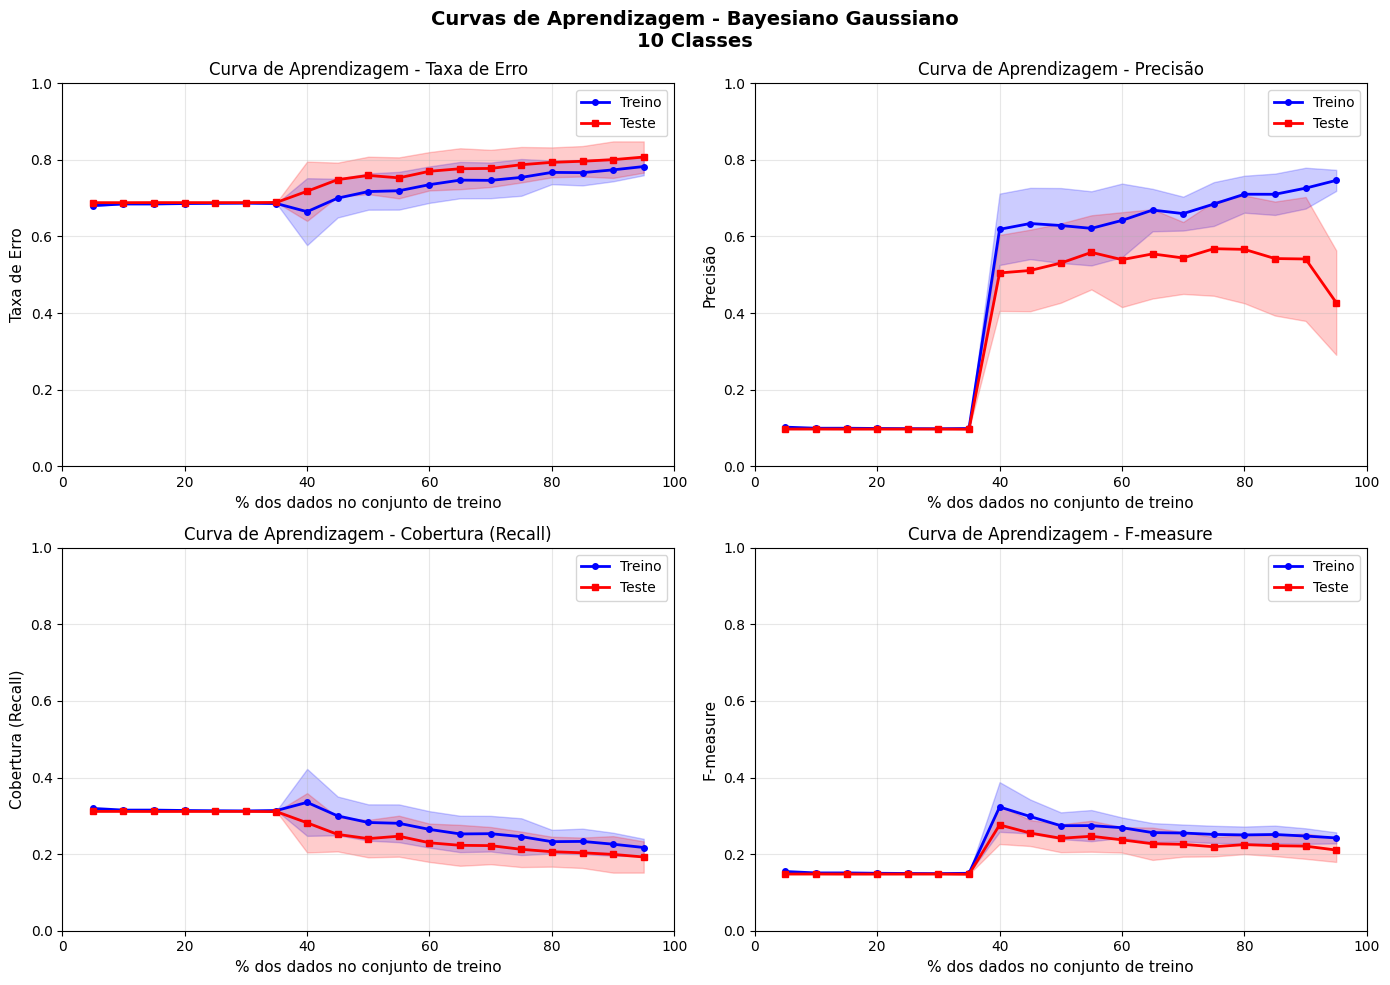


2 CLUSTERS (KFCM-K-W-1)
  Progress: 5/19 samples
  Progress: 10/19 samples
  Progress: 15/19 samples

Figura salva em: ../results/q2_curvas_aprendizagem_2classes.png


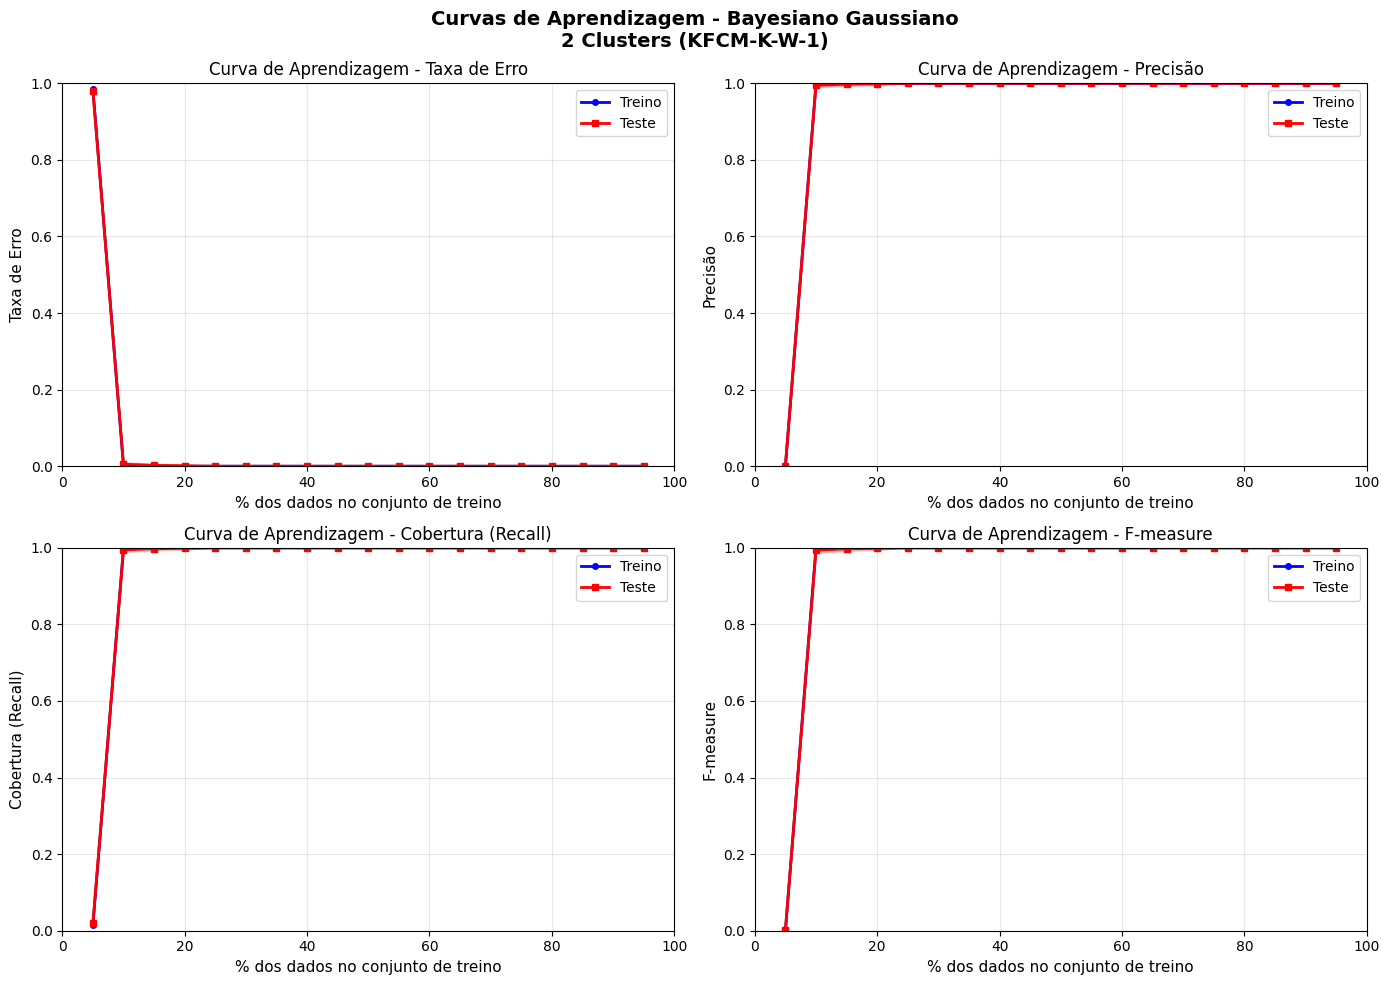

In [6]:
"""

"Para cada métrica de avaliação, plot a curva de aprendizagem para o
classificador bayesiano Gaussiano. Mais precisamente, considere conjuntos
de treinamento e teste de (5%, 95%) a (95%, 5%) do conjunto original de
treinamento, com passo de 5% (usando amostragem estratificada). Para cada
par de conjuntos de treinamento e teste, compute as métricas de avaliação
tanto no conjunto de treinamento como no conjunto de teste. Comente."

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin
import warnings
warnings.filterwarnings('ignore')

def calculate_metrics(y_true, y_pred, average='weighted'):
    return {
        'error_rate': 1 - accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average=average, zero_division=0),
        'recall': recall_score(y_true, y_pred, average=average, zero_division=0),
        'f1': f1_score(y_true, y_pred, average=average, zero_division=0)
    }


def stratified_sample(X, y, train_size, random_state=42):
    np.random.seed(random_state)

    classes = np.unique(y)
    train_indices = []
    test_indices = []

    for c in classes:
        class_indices = np.where(y == c)[0]
        np.random.shuffle(class_indices)

        n_train = max(1, int(len(class_indices) * train_size))

        train_indices.extend(class_indices[:n_train])
        test_indices.extend(class_indices[n_train:])

    train_indices = np.array(train_indices)
    test_indices = np.array(test_indices)

    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]


def compute_learning_curves(X, y, train_sizes=None, n_runs=10):
    if train_sizes is None:
        train_sizes = np.arange(0.05, 1.0, 0.05)  # 5% a 95%, passo 5%

    metrics = ['error_rate', 'precision', 'recall', 'f1']

    results = {
        'train_sizes': train_sizes,
        'train': {m: [] for m in metrics},
        'test': {m: [] for m in metrics},
        'train_std': {m: [] for m in metrics},
        'test_std': {m: [] for m in metrics}
    }

    # creating learning courves
    for i, train_size in enumerate(train_sizes):
        train_metrics_runs = {m: [] for m in metrics}
        test_metrics_runs = {m: [] for m in metrics}

        for run in range(n_runs):
            # stratified sample
            X_train, X_test, y_train, y_test = stratified_sample(
                X, y, train_size, random_state=run
            )

            if len(X_train) < 2 or len(X_test) < 2:
                continue

            # adjust classifier
            try:
                clf = GaussianBayesian()
                clf.fit(X_train, y_train)

                y_pred_train = clf.predict(X_train)
                y_pred_test = clf.predict(X_test)

                m_train = calculate_metrics(y_train, y_pred_train)
                m_test = calculate_metrics(y_test, y_pred_test)

                for m in metrics:
                    train_metrics_runs[m].append(m_train[m])
                    test_metrics_runs[m].append(m_test[m])
            except Exception as e:
                continue

        # metrics
        for m in metrics:
            if train_metrics_runs[m]:
                results['train'][m].append(np.mean(train_metrics_runs[m]))
                results['test'][m].append(np.mean(test_metrics_runs[m]))
                results['train_std'][m].append(np.std(train_metrics_runs[m]))
                results['test_std'][m].append(np.std(test_metrics_runs[m]))
            else:
                results['train'][m].append(np.nan)
                results['test'][m].append(np.nan)
                results['train_std'][m].append(np.nan)
                results['test_std'][m].append(np.nan)

        if (i + 1) % 5 == 0:
            print(f"  Progress: {i+1}/{len(train_sizes)} samples")

    return results


def plot_learning_curves(results, version_name, output_file=None):
    train_sizes = results['train_sizes'] * 100  

    metrics = ['error_rate', 'precision', 'recall', 'f1']
    metric_names = ['Taxa de Erro', 'Precisão', 'Cobertura (Recall)', 'F-measure']

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Curvas de Aprendizagem - Bayesiano Gaussiano\n{version_name}',
                 fontsize=14, fontweight='bold')

    for ax, metric, title in zip(axes.flatten(), metrics, metric_names):
        train_mean = np.array(results['train'][metric])
        test_mean = np.array(results['test'][metric])
        train_std = np.array(results['train_std'][metric])
        test_std = np.array(results['test_std'][metric])

        ax.plot(train_sizes, train_mean, 'b-o', label='Treino', markersize=4, linewidth=2)
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                       alpha=0.2, color='blue')

        ax.plot(train_sizes, test_mean, 'r-s', label='Teste', markersize=4, linewidth=2)
        ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,
                       alpha=0.2, color='red')

        ax.set_xlabel('% dos dados no conjunto de treino', fontsize=11)
        ax.set_ylabel(title, fontsize=11)
        ax.set_title(f'Curva de Aprendizagem - {title}', fontsize=12)
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)
        ax.set_xlim(0, 100)

        if metric == 'error_rate':
            ax.set_ylim(0, 1)
        else:
            ax.set_ylim(0, 1)

    plt.tight_layout()

    if output_file:
        plt.savefig(output_file, dpi=150, bbox_inches='tight')
        print(f"\nFigura salva em: {output_file}")

    plt.show()

if __name__ == "__main__":
    df = pd.read_csv('yeast.csv')
    X = df.drop(['Sequence Name', 'Class'], axis=1).values
    y_original = df['Class'].values

    # Labels do KFCM-K-W-1
    y_2classes = np.loadtxt('../results/crisp_partition.txt').astype(int)

    # Codificar 10 classes
    le = LabelEncoder()
    y_10classes = le.fit_transform(y_original)

    print(f"    Amostras: {len(y_original)}")
    print(f"    Features: {X.shape[1]}")

    # Normalizar
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print("\n" + "="*70)
    print("10 CLASSES")
    print("="*70)

    results_10 = compute_learning_curves(X_scaled, y_10classes, n_runs=10)
    plot_learning_curves(results_10, "10 Classes", output_file='../results/q2_curvas_aprendizagem_10classes.png')

    print("\n" + "="*70)
    print("2 CLUSTERS (KFCM-K-W-1)")
    print("="*70)

    results_2 = compute_learning_curves(X_scaled, y_2classes, n_runs=10)
    plot_learning_curves(results_2, "2 Clusters (KFCM-K-W-1)", output_file='../results/q2_curvas_aprendizagem_2classes.png')
